# Quantum Hello, World!

Thanks to Qiskit tutorials and IBM Quantum experience and my QC Fun colleagues!

[YouTube]( https://www.youtube.com/watch?v=RrUTwq5jKM4&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=4&t=0s )

### Creating a 2 qubit quantum register and 2 classical register to make measurements.


# Building the circuit
We begin by importing Qiskit

In [42]:
# from qiskit import *
# from qiskit.tools.visualization import circuit_drawer
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [43]:
#Creates a two qubit quantum register
qr = QuantumRegister(2)

In [44]:
#creates two classical register to take measurement from Quantum bits
cr = ClassicalRegister(2)

In [45]:
#create a quantum circuit
circuit = QuantumCircuit(qr, cr)

In [46]:
#to draw the circuit textbased
circuit.draw()

q12_0: 
       
q12_1: 
       
c12: 2/

In [47]:
#draws circuit from matplotlib
circuit.draw('mpl')

ImportError: The class MatplotlibDrawer needs pylatexenc. to install, run "pip install pylatexenc".

We have created 2 qbits and 2 classical bit registers

$q1_0:|0>$ and $q1_1: |0>$ are quantum bits. Likewise $c0_0$ and $c0_1$ are classical bits. We will be creating gates in this circuit. We will add Hadamard gate to the first qubit. 

In [48]:
#Adding Hardmard to first qubit
circuit.h(qr[0])

In [49]:
#drawing a circuit
circuit.draw()

┌───┐
q12_0: ┤ H ├
       └───┘
q12_1: ─────
            
c12: 2/═════

In [50]:
#drawing a circuit
circuit.draw(output='mpl')

ImportError: The class MatplotlibDrawer needs pylatexenc. to install, run "pip install pylatexenc".

In the circuit above Hadamard operator was added. However operation was not applied. Now, two qubit operation called Controlled X will be applied which is anlogous to classica XOR gate. Here, the first qubit acts as a control and second becomes the target.

[Controlled Not Gate Wiki](https://en.wikipedia.org/wiki/Controlled_NOT_gate )

In [10]:
#control is the first qubit, target is the second qubit
circuit.cx(qr[0], qr[1])

In [11]:
circuit.draw()

┌───┐     
q0_0: |0>┤ H ├──■──
         └───┘┌─┴─┐
q0_1: |0>─────┤ X ├
              └───┘
 c0_0: 0 ══════════
                   
 c0_1: 0 ══════════

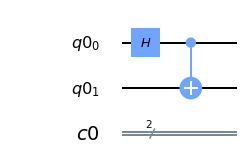

In [12]:
circuit.draw(output='mpl')

With these 2 simple operations we are able to create entanglement between $q0_0$ and $q0_1$. Now we will meature these qubits, and take those measurements and store them into the classical bits

In [13]:
#Takes the results from the qubits in the quantum register 
#and store them in the classical register
circuit.measure(qr, cr)

In [15]:
#citcuit now has measurement built into it

In [16]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: |0>┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q0_1: |0>─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
 c0_0: 0 ═══════════╩══╬═
                       ║ 
 c0_1: 0 ══════════════╩═

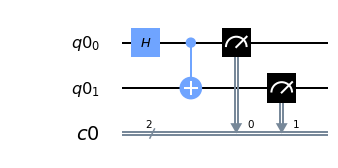

In [30]:
circuit.draw(output='mpl')

# Running on simulator

Now we will run this circuit on a classical computer and see what happens to this quantum circuit. Once, we are confident we can send it off to a real Quantum computer at IBM, and see
the results from the IBM QC. In order to run this circuit in the classical computer, we will use the air component of Qiskit. 

In [18]:
#Aer does the simulation of our quantum circuits on our local computer. 
#importing Aer simulator. name of the sumulator is QASM (Quantum Assembly Language)
simulator = Aer.get_backend('qasm_simulator')

In [19]:
#execute the circuit
result=execute(circuit, backend=simulator).result()

In [20]:
from qiskit.visualization import plot_histogram

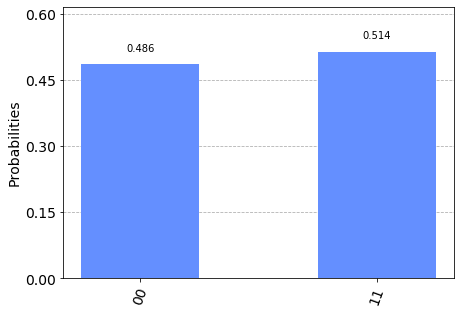

In [21]:

plot_histogram(result.get_counts(circuit))

# Running on QC at IBM

In [22]:
#load IBM account which has to be pre-set
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
#choose on which device to run the code
provider =IBMQ.get_provider('ibm-q')

In [24]:
#name of the device, device is not located in melbourne
qcomp = provider.get_backend('ibmq_16_melbourne')

In [25]:
job = execute(circuit, backend= qcomp)

In [26]:
from qiskit.tools.monitor import job_monitor

In [27]:
job_monitor(job)

Job Status: job has successfully run


In [28]:
result = job.result()

In [20]:
plot_histogram(result.get_counts(circuit))

NameError: name 'plot_histogram' is not defined

In [31]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw(output='mpl')
# circuit_drawer(qc,style={'backgroundcolor': '#EEEEEE'})

ImportError: The class MatplotlibDrawer needs pylatexenc. to install, run "pip install pylatexenc".

In [26]:
[default]
circuit_drawer=mpl

NameError: name 'default' is not defined